# Week 3 assignment

## Introduction about the analysis

A complete introduction was given in the [Week 1 assignment](https://github.com/srodriguex/coursera_regression_modeling_practice/blob/master/Week_1.md). Please, refer to this entry to be acquainted to the Gapminder dataset donated to this Coursera Regression Modeling in Practice course, the sample and procedure of data collected.

## Objective

In this exercise, the main objective is to find what variables are related to life expectancy, wich one contribute to expand, or reduce, the average maximum age for each country, and their respective contribution. So, instead of state a prior hypothesis about some particular variables, we'll start evaluating all at hand and reduce the set as needed until a mininum subset of variables statisticaly significant. The `lifeexpectancy` is our response variable, and all the others are the explanatory varibles. After the managment of missing data, we'll perform an linear regression analysis as the tool to evaluate relationship among them. 


## Requirements to reproduce this analysis

This is a PDF version of an IPython Notebook. [Click here](https://github.com/srodriguex/coursera_regression_modeling_practice/blob/master/Week_2.ipynb) to access the source version to reproduce this analysis.

In order to run this notebook on your local machine, you must have:

* [Python interpreter](http://python.org) => 3.4
* [IPython Notebook](http://ipython.org) >= 4.0 
* [IPython Notebook extensions](https://github.com/ipython-contrib/IPython-notebook-extensions) - Used to embed Python variables in Markdown text!

In order to ease the installation of Python, libraries and tools, give a chance to [Anaconda distribution](https://www.continuum.io/downloads).



In [14]:
# Imports section.

# Import all Numpy, Scipy and matplolib stuff.
%pylab inline

# Silence some warnings about converting data.
import warnings
warnings.simplefilter('ignore', Warning)

# Library to deal with dataframes like in R.
import pandas as pd

# Nice looking plotting libray for statistical analysis.
import seaborn as sn

# Package for running linear regressions using R like formulas.
from statsmodels.formula.api import ols



Populating the interactive namespace from numpy and matplotlib


In [15]:
# Read the dataset into a pandas.DataFrame object.
df = pd.read_csv('./data/gapminder.csv')

# Define the countries as the index. 
df.index = df.country

# As it's the index, we can remove the column.
del df['country']

# Subset the dataframe to the desired variables.
#df = df[['lifeexpectancy','incomeperperson','alcconsumption','co2emissions', 'employrate']]

# Convert all to numeric, and put NaN in missing values.
df = df.convert_objects(convert_numeric=True)


## Checking for missing values.

In [24]:
print('Total of countries: {}'.format(len(df)))

Total of countries: 213


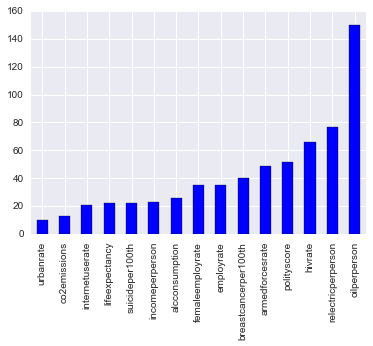

In [25]:
nulls = df.isnull().sum()
nulls.sort()
nulls.plot(kind='bar');

We see above that the dataset comes to 213 observations of countries. Checking for the missing values the explanatory variable `oiperperson` has 

# Variables
## Response variable


1. Life expectancy
> 2011 life expectancy at birth (years)
The average number of years a newborn child would live if current
mortality patterns were to stay the same.

## Explanatory variables


1. Income per person
> 2010 Gross Domestic Product per capita in constant 2000 US$. The
inflation but not the differences in the cost of living between countries
has been taken into account.

1. Consumption of alcohol
> 2008 alcohol consumption per adult (age 15+), litres.
Recorded and estimated average alcohol consumption, adult (15+) per
capita consumption in litres pure alcohol.

1. CO2 emissions
> 2006 cumulative CO2 emission (metric tons), Total amount of CO2
emission in metric tons since 1751.

1. Employ rate
> 2007 total employees age 15+ (% of population)
Percentage of total population, age above 15, that has been employed
during the given year.


### Pearson Correlation between the variables

For curiosity, let's take a look at pairwise correlation between the variables.

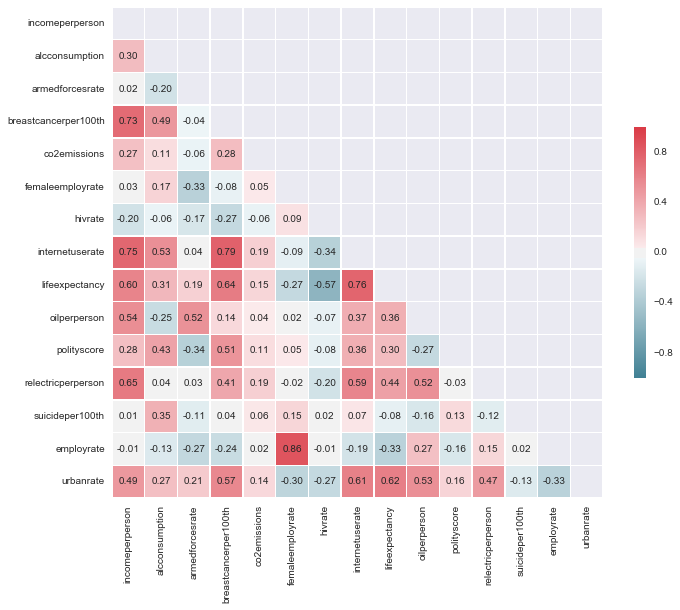

In [4]:
# Get pandas to calculate pairwise correlations.
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# A wild plot appears!
f, ax = plt.subplots(figsize=(11*1, 9*1))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, 
           annot=True, fmt='.2f' );

It's clear this selection of explanatory variables don't give much information about the response variable, but, we'll not deal with this problem right now. The decision was made, let's go throught it.

## Descriptive analysis

Pandas DataFrame has nice methods to summary the data at hand.

In [11]:
# Concise summary about the structure of the data.
type(df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, Algeria to Uzbekistan
Data columns (total 15 columns):
incomeperperson         56 non-null float64
alcconsumption          56 non-null float64
armedforcesrate         56 non-null float64
breastcancerper100th    56 non-null float64
co2emissions            56 non-null float64
femaleemployrate        56 non-null float64
hivrate                 56 non-null float64
internetuserate         56 non-null float64
lifeexpectancy          56 non-null float64
oilperperson            56 non-null float64
polityscore             56 non-null float64
relectricperperson      56 non-null float64
suicideper100th         56 non-null float64
employrate              56 non-null float64
urbanrate               56 non-null float64
dtypes: float64(15)
memory usage: 7.0+ KB


NoneType

In [6]:
# Overview of summary statistics.
df.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,190.000000,187.000000,164.000000,173.000000,2.000000e+02,178.000000,147.000000,192.000000,191.000000,63.000000,161.000000,136.000000,191.000000,178.000000,203.000000
mean,8740.966076,6.689412,1.444016,37.402890,5.033262e+09,47.549438,1.935442,35.632716,69.753524,1.484085,3.689441,1173.178995,9.640839,58.635955,56.769360
std,14262.809083,4.899617,1.709008,22.697901,2.573812e+10,14.625743,4.376727,27.780285,9.708621,1.825090,6.314899,1681.440173,6.300178,10.519454,23.844933
min,103.775857,0.030000,0.000000,3.900000,1.320000e+05,11.300000,0.060000,0.210066,47.794000,0.032281,-10.000000,0.000000,0.201449,32.000000,10.400000
25%,748.245151,2.625000,0.480907,20.600000,3.484617e+07,38.725000,0.100000,9.999604,64.447000,0.532541,-2.000000,203.652109,4.988449,51.225000,36.830000
50%,2553.496056,5.920000,0.930638,30.000000,1.859018e+08,47.549999,0.400000,31.810121,73.131000,1.032470,6.000000,597.136436,8.262893,58.699999,57.940000
75%,9379.891165,9.925000,1.611383,50.300000,1.846084e+09,55.875000,1.300000,56.416046,76.593000,1.622737,9.000000,1491.145249,12.328551,64.975000,74.210000
max,105147.437697,23.010000,10.638521,101.100000,3.342209e+11,83.300003,25.900000,95.638113,83.394000,12.228645,10.000000,11154.755033,35.752872,83.199997,100.000000


We see that this dataset has a total of {{df.shape[0]}} observations, each one corresponding to a country. Unfortunately, all variable has missing values. Given that each country is sovereign and theoretically independent from the others, we can't assume any way to fill in those missing values by avering neighbor countries, neither can we set zero values to them. So, in the sake of simplicity, we'll drop all contries with any missing values.

In [7]:
# Drop all rows with any missing value.

# Number of rows before dropping data.
num_before = len(df) 

# Drop the missing values.
df = df.dropna()

# Number of rows after dropping data.
num_after = len(df) 

This management of the missing values lowered our set from 213 observations to {{df.shape[0]}}, nearly {{('{:.0f}%'.format((1-num_before/num_after )*100))}}. Well, this is the way with trimming missing values as a shortcut for fast analysis. Other workarounds could be executed like searching for the missing data in other sources or averaging nearby countries. We decided to just drop them. Let's take a look again in the summary after this management.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, Algeria to Uzbekistan
Data columns (total 15 columns):
incomeperperson         56 non-null float64
alcconsumption          56 non-null float64
armedforcesrate         56 non-null float64
breastcancerper100th    56 non-null float64
co2emissions            56 non-null float64
femaleemployrate        56 non-null float64
hivrate                 56 non-null float64
internetuserate         56 non-null float64
lifeexpectancy          56 non-null float64
oilperperson            56 non-null float64
polityscore             56 non-null float64
relectricperperson      56 non-null float64
suicideper100th         56 non-null float64
employrate              56 non-null float64
urbanrate               56 non-null float64
dtypes: float64(15)
memory usage: 7.0+ KB


In [8]:
df.describe()

,lifeexpectancy,incomeperperson,alcconsumption,co2emissions,employrate
count,160.000000,160.000000,160.000000,1.600000e+02,160.000000
mean,69.415913,7262.857779,6.824313,6.198259e+09,59.076875
std,9.835586,10538.968167,5.025791,2.866868e+10,10.425623
min,47.794000,103.775857,0.050000,8.506667e+05,34.900002
25%,62.646000,605.817038,2.657500,8.062908e+07,51.375001
50%,73.126500,2385.184105,6.100000,2.803772e+08,58.850000
75%,76.569500,8497.779228,9.990000,2.410131e+09,65.000000
max,83.394000,52301.587179,23.010000,3.342209e+11,83.199997


The mean of `incomeperperson` and `co2emissions` variables are way above the other variables. This can be a problem to the linear regression, but it's not addressed in this assignment though. Hoping it will come in the next lessons. All columns have 160 valid observations, we can safely proceed to the next step.

## Overview of the variables distribution

Here we plot the distribution of the selected variables to better visualize the distrbution. The `hist` method from `pandas.DataFrame` object comes in our help in plotting automatically histograms for all the variables within the dataframe object, and we just have to config the size and bins desired.

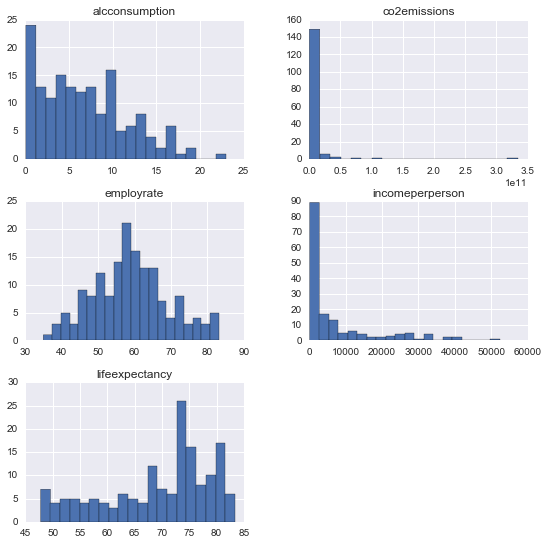

In [9]:
df.hist(bins=20, figsize=(9,9));

## Centering the variables

The image above shows that CO2 consumption and income per person variables are not fairly distributed along x axis, they're highly left skewed. Let's manage this data subtracting their respective means, namely, centering them.

In [10]:
# Subtract the mean.
dfmean = df - df.mean()

# Summarize again.
dfmean.describe()

,lifeexpectancy,incomeperperson,alcconsumption,co2emissions,employrate
count,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02
mean,-1.860734e-14,7.730705e-13,2.242651e-15,7.629395e-07,-3.996803e-16
std,9.835586e+00,1.053897e+04,5.025791e+00,2.866868e+10,1.042562e+01
min,-2.162191e+01,-7.159082e+03,-6.774312e+00,-6.197408e+09,-2.417687e+01
25%,-6.769913e+00,-6.657041e+03,-4.166812e+00,-6.117630e+09,-7.701874e+00
50%,3.710587e+00,-4.877674e+03,-7.243125e-01,-5.917882e+09,-2.268747e-01
75%,7.153587e+00,1.234921e+03,3.165688e+00,-3.788128e+09,5.923125e+00
max,1.397809e+01,4.503873e+04,1.618569e+01,3.280226e+11,2.412312e+01


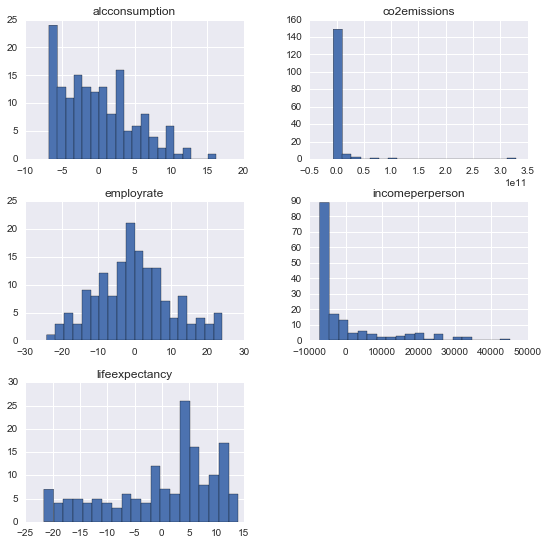

In [11]:
dfmean.hist(bins=20, figsize=(9,9));

It shouldn't be a surpise that the shape of the histograms didn't change at all, because centering a variable is just a linear transformation over $x$ axis, centenring them around the mean at  $x=0$, this don't work well for exponential distributions though.

# Linear Regression

## First model

In [12]:
# Formula for the linear regression with the selected variables.
formula='lifeexpectancy ~ incomeperperson + alcconsumption  + co2emissions + employrate'

# Prepare and fit the model to the least squared error.
model = ols(formula=formula, data=dfmean)
res = model.fit()

# Output the summary.
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     34.95
Date:                Thu, 26 Nov 2015   Prob (F-statistic):           8.73e-21
Time:                        14:13:29   Log-Likelihood:                -540.86
No. Observations:                 160   AIC:                             1092.
Df Residuals:                     155   BIC:                             1107.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -1.854e-14      0.571  -3.

It's clear the CO2 emissions is not correlated to the life expectancy. The p-value is way above 0.05 significance level. Let's remove it from the model and run in again.

## Second model

In [13]:
formula='lifeexpectancy ~ incomeperperson + alcconsumption   + employrate'
model = ols(formula=formula, data=dfmean)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     46.79
Date:                Thu, 26 Nov 2015   Prob (F-statistic):           1.27e-21
Time:                        14:13:31   Log-Likelihood:                -540.95
No. Observations:                 160   AIC:                             1090.
Df Residuals:                     156   BIC:                             1102.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -1.854e-14      0.570  -3.

The alcohol consumption maintains its p-value beyond the significance limit, even after removing CO2 emission. We'll run the model again without this variable.

## Third model

In [14]:
formula='lifeexpectancy ~ incomeperperson  + employrate'
model = ols(formula=formula, data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     68.48
Date:                Thu, 26 Nov 2015   Prob (F-statistic):           4.14e-22
Time:                        14:13:38   Log-Likelihood:                -542.11
No. Observations:                 160   AIC:                             1090.
Df Residuals:                     157   BIC:                             1099.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          82.8420      3.330     

Now the remaining explanatory variables have p-value below the significance level but note the coeficcient for income per perons is too low, meaning that each unit increment in this variable reflects in 0.0006 unit in life expectancy. This is due to the exponential relationship of income vs life expectancy rather than linear, as we can see in the scatter plot below.

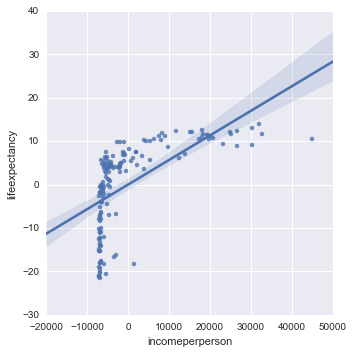

In [15]:
sn.lmplot('incomeperperson', 'lifeexpectancy', dfmean);

To address this issue we'll transform the income per person variable into a log function. See how the scatter plot below behaves after this transformation. 

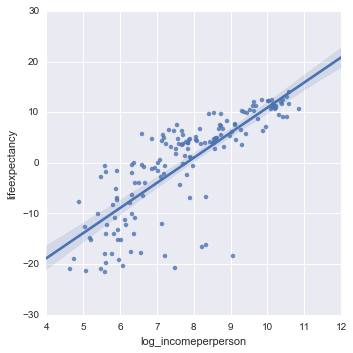

In [16]:
dfmean['log_incomeperperson'] = log(df.incomeperperson)
sn.lmplot('log_incomeperperson', 'lifeexpectancy', dfmean);


We now have a linear correlation but the interpretation over the coefficient resulted in the linear regression it's different. According to [this article](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/log_transformed_regression.htm), a fixed change in say $d\%$ in the log explanatory variable will result in a fixed changed of $\beta_j*log((1+d/100))$, for $\beta_j$ the respective coefficient in the new model below for the log(incomeperperson) variable.

## Fourth and final model

In [17]:
formula='lifeexpectancy ~ log(incomeperperson)  + employrate'
model = ols(formula=formula, data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     150.9
Date:                Thu, 26 Nov 2015   Prob (F-statistic):           2.73e-37
Time:                        14:15:54   Log-Likelihood:                -506.49
No. Observations:                 160   AIC:                             1019.
Df Residuals:                     157   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               38.3155 

So, by the model above, a unit increment in `employrate` explanatory variable reflects in 0.1 unit decrement of `lifeexpectancy` response variable. There's a slightly linear relationship between those variables, but in the inverse order. For the log of income per person explanatory variable, `log(incomeperperson)`, say, a fixed 10% change in this explanatory variable changes the response variable in $4.77*log(1.10) = 0.45$ units, according to a positive correlation.

By the result above, we can sate that the life expectancy is benefited by a rise in income per person. We may interpret this as the more the income, the more a person can invest in a healthier way of life and welcare, anything that prevents an early death, but the real reasons demand a proper investigation beyond the scope of this exercise.

An unexpected result is the negative correlation between employ rate and life expectancy. Our initial assumption was that an increase in employ rate would increase the life expectancy as well, but this dataset and method chosen says the contrary. This also demands a detailed investigation beyond the scope of this exercise, but we can speculate that would be the case a longer life is benefited by a not so longer labor life if you're able to save an amount of money, or welfare state policies for retired people to maintain a sustainable living health.

The end.